2D로 'Reflect' 모드로 padding하는 함수 추가 (layers.py)
get_config 관련 에러 해결

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN import CycleGAN
from utils.loaders import DataLoader

In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0014'
DATA_NAME = 'monet2photo'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' # 'build' #

In [4]:
IMAGE_SIZE = 256
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

In [5]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0002
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 5
    , generator_type = 'resnet'
    , gen_n_filters = 32
    , disc_n_filters = 64
    )
if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
gan.g_BA.summary()
gan.g_AB.summary()
gan.d_A.summary()
gan.d_B.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
reflection_padding2d_20 (Reflec (None, 262, 262, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 256, 256, 32) 4736        reflection_padding2d_20[0][0]    
__________________________________________________________________________________________________
instance_normalization_29 (Inst (None, 256, 256, 32) 0           conv2d_32[0][0]                  
____________________________________________________________________________________________

In [7]:
BATCH_SIZE = 1
EPOCHS = 300
PRINT_EVERY_N_BATCHES = 300

TEST_A_FILE = '00010.jpg'
TEST_B_FILE = '2014-08-04 11:06:56.jpg'

In [ ]:
%%time
gan.train(data_loader,
          run_folder = RUN_FOLDER,
          epochs=EPOCHS,
          test_A_file = TEST_A_FILE,
          test_B_file = TEST_B_FILE,
          batch_size=BATCH_SIZE,
          sample_interval=PRINT_EVERY_N_BATCHES)

#[Epoch 299/300] [Batch 1070/1072] [D loss: 0.031158, acc:  99%] [G loss: 2.865439, adv: 0.493888, recon: 0.164516, id: 0.145278] time: 1 day, 4:55:40.032811 
#CPU times: user 1d 1h 33min 5s, sys: 3h 44min 36s, total: 1d 5h 17min 42s
#Wall time: 1d 4h 55min 40s

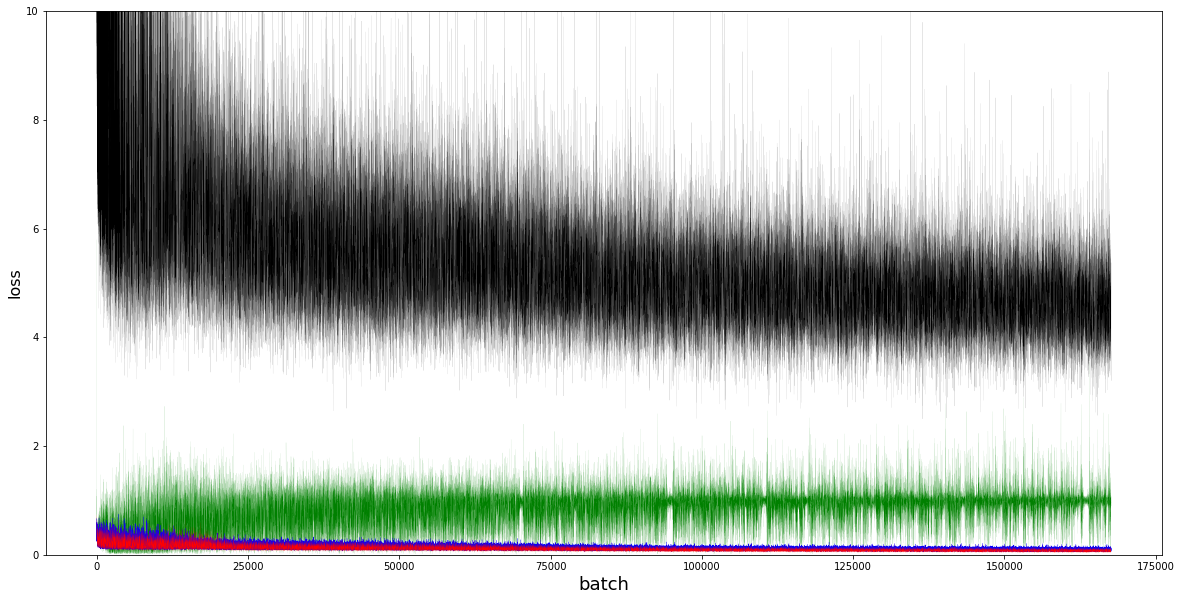

In [11]:

fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.05) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.25) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.05) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.05)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 10)

plt.show()

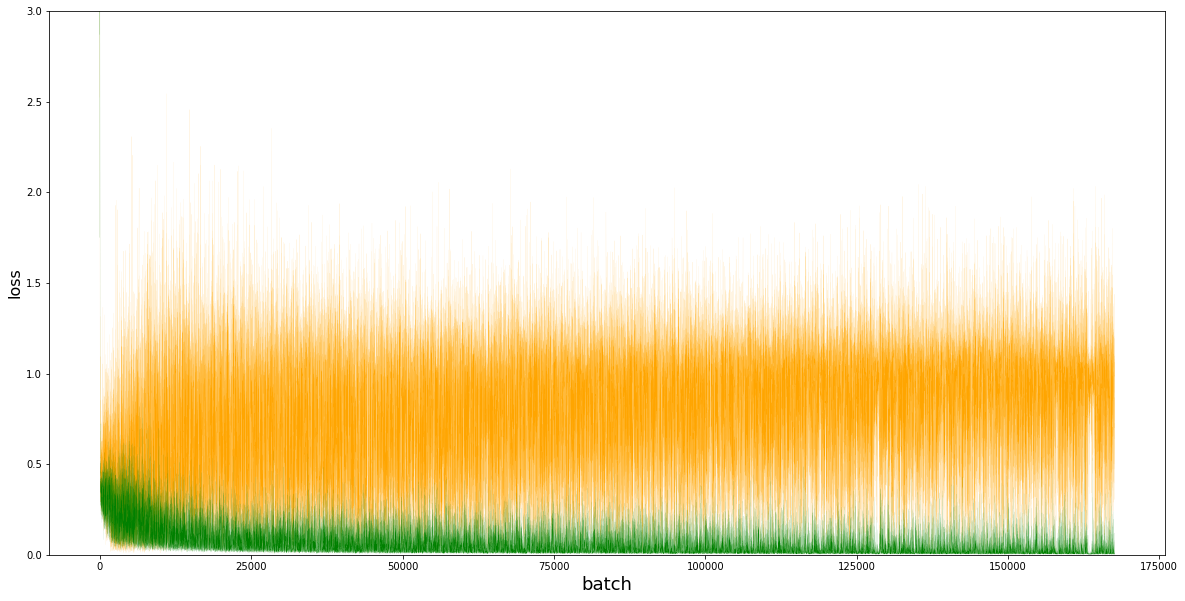

In [12]:
fig = plt.figure(figsize=(20,10))
plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.05)
#plt.plot([x[4] for x in gan.g_losses], color='red', linewidth=0.25)
#plt.plot([x[6] for x in gan.g_losses], color='blue', linewidth=0.25)
plt.plot([x[0] for x in gan.d_losses], color='green', linewidth=0.05)
plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 3)

plt.show()

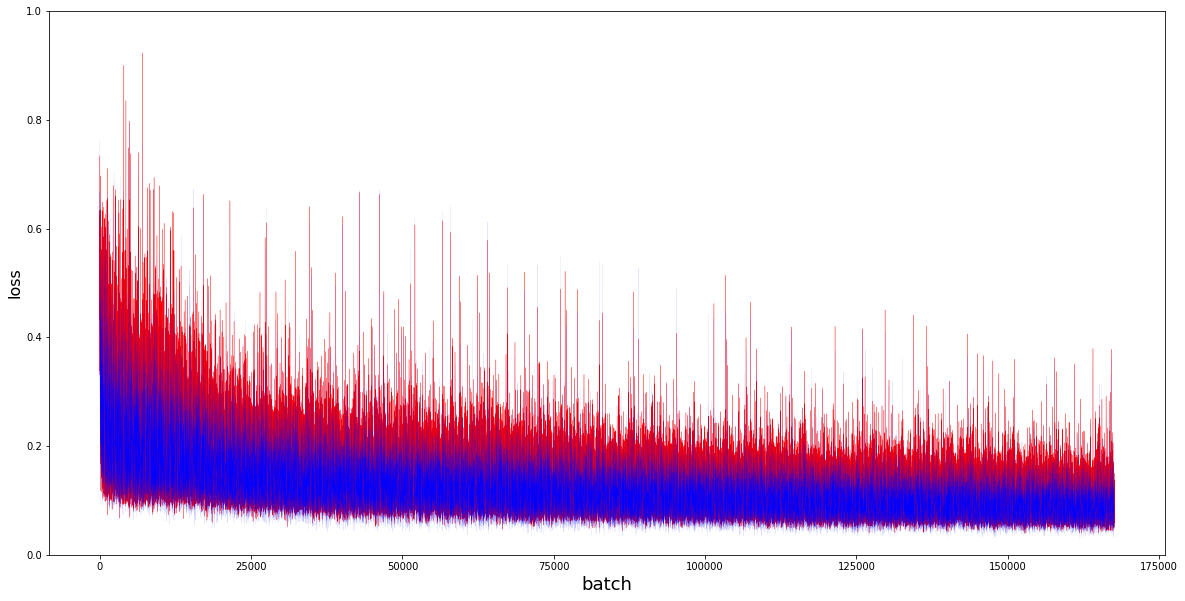

In [13]:
fig = plt.figure(figsize=(20,10))
plt.plot([x[4] for x in gan.g_losses], color='red', linewidth=0.25)
plt.plot([x[6] for x in gan.g_losses], color='blue', linewidth=0.05)
plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 1)

plt.show()